In [1]:
import os
import joblib
import sys
import matplotlib.pyplot
sys.path.append(os.path.abspath("../tools/"))
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = joblib.load( open("../final_project/final_project_dataset.pkl", "rb") )
data_dict.pop("TOTAL", 0)
# data_dict = joblib.load( open("../final_project/final_project_dataset_modified.pkl", "rb") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

# print(data[:4])
### 
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"


from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)
print(reg.coef_) 
print(reg.intercept_) 
data = sorted(data, key=lambda x: x[1], reverse=True)
print(data[0])


[0.11040529]
194142.76516680408
[ 339288. 8000000.]


In [32]:
# what percentage had total_payments as NaN
# assgnd = [k1 for k, (k1, v1) in enumerate(data_dict.items()) if v1["bonus"] == 97343619]


assgnd = [(k1,v1) for k, (k1, v1) in enumerate(data_dict.items()) if v1["bonus"] != "NaN" and v1["salary"] != "NaN"
          and v1["bonus"] > 5000000 and v1["salary"] > 1000000]
print(sorted(assgnd, key=lambda x:x[1]["bonus"], reverse=True)[:2])

SyntaxError: invalid syntax (3170814887.py, line 7)

-3.0086569898246394


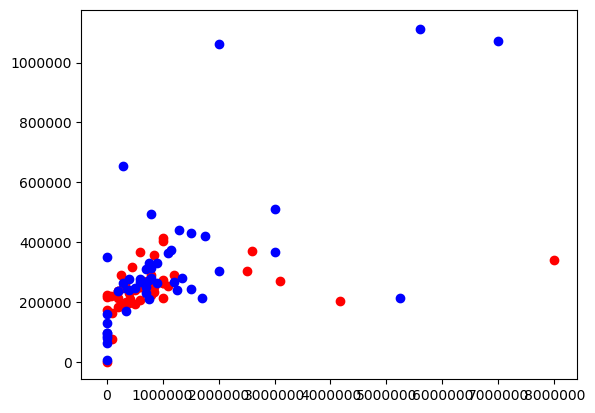

In [2]:
# # Explained variance score: 1 is perfect prediction
# # and 0 means that there is no linear relationship
# # between X and y.
from sklearn.metrics import mean_squared_error, r2_score
scr = r2_score(target_test, reg.predict(feature_test)) # error score 
# scr = reg.score(feature_test,target_test)
print(scr)

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color )
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


/home/aditya/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
No handles with labels found to put in legend.


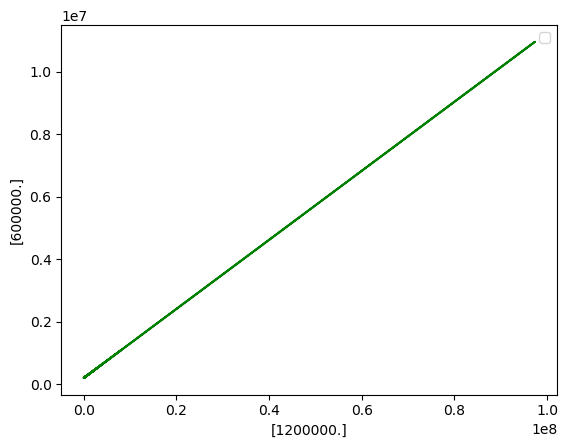

In [7]:
try:
    # plt.plot( feature_train, reg.predict(feature_train) )
    # reg.fit(feature_test, target_test)
    plt.plot( feature_test, reg.predict(feature_test), color='g' )
    # print(reg.coef_) 
except NameError:
    pass
plt.xlabel(features[1])
plt.ylabel(features[0])
plt.legend()
plt.show()
